# Bitcoin Predictor
Bitcoin is a decentralized digital currency created in January 2009. It follows the ideas set out in a white paper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms do, and unlike government-issued currencies, it is operated by a decentralized authority. (ref. Investopedia)

This Bitcoin Predictor uses a data with 3245 days of Trading properties such as:
- Date (str, date time): Time of measurement
- Price (float): Price of Bitcoin at the end of the day (midnight)
- Open (float): Price of Bitcoin at the start of the day (midnight)
- High (float): Highest price of Bitcoin during the day
- Low (float): Lowest price of Bitcoin during the day
- Vol. (float): Approximated count of transactions (Buy/Sell) of Bitcoin
- Change % (float, percentage): Percentage between the Price and Open


## Importing

In [1]:
#import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## Pre-processing
Many Preprocessing are done with Excel's functions.

In [2]:
#importing data
import io
from datetime import datetime

custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y")
df = pd.read_csv("Bitcoin Historical Data copy.csv",
                     parse_dates=['Date','Year'],
                    date_parser=custom_date_parser,
                    index_col= ['Date'])

df = df.drop(['Vol.'], axis=1)
df

,Price,Open,High,Low,Change %,Volume,Year
Date,,,,,,,
2021-11-19,57055.5,56908.3,57502.4,55626.3,0.0018,110950,2021-11-19
2021-11-18,56955.3,60368.2,60936.9,56524.4,-0.0565,100370,2021-11-18
2021-11-17,60367.8,60074.2,60814.5,58531.9,0.0046,73930,2021-11-17
2021-11-16,60089.1,63605.1,63605.6,58655.9,-0.0552,115360,2021-11-16
2021-11-15,63597.9,65514.9,66311.2,63439.5,-0.0292,53530,2021-11-15
...,...,...,...,...,...,...,...
2013-01-05,13.4,13.5,13.6,13.3,-0.0044,21330,2013-01-05
2013-01-04,13.5,13.4,13.5,13.3,0.0075,29640,2013-01-04
2013-01-03,13.4,13.3,13.5,13.3,0.0090,18030,2013-01-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3245 entries, 2021-11-19 to 2013-01-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Price     3245 non-null   float64       
 1   Open      3245 non-null   float64       
 2   High      3245 non-null   float64       
 3   Low       3245 non-null   float64       
 4   Change %  3245 non-null   float64       
 5   Volume    3245 non-null   int64         
 6   Year      3245 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 202.8 KB


In [35]:
X = df.drop(['Year','Price'],axis=1).fillna(0)
y = df.drop(['Change %','Volume','Year','Open','High','Low'],axis=1).fillna(0)

Text(0, 0.5, 'Price')

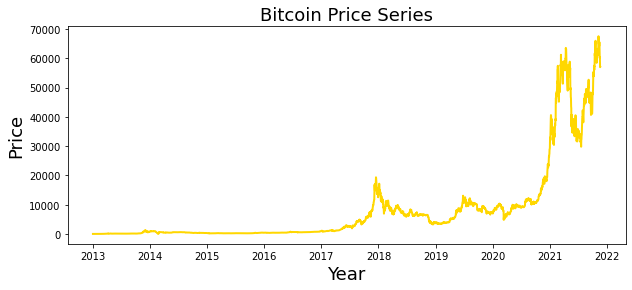

In [5]:
plt.figure(figsize = (10, 4))
plt.plot(df["Year"], df["Price"], color='Gold', lw=2)
plt.title("Bitcoin Price Series", size=18)
plt.xlabel("Year", size=18)
plt.ylabel("Price", size=18)

In [6]:
btc_train = pd.concat([
            df.loc['2014'], df.loc['2015'],
            df.loc['2016'], df.loc['2017'],
            df.loc['2018'], df.loc['2019']])

X_train = btc_train.drop(['Year','Price'],axis=1).fillna(0)
y_train = btc_train.drop(['Change %','Volume','Year','Open','High','Low'],axis=1).fillna(0)
X_train

,Open,High,Low,Change %,Volume
Date,,,,,
2014-12-31,311.3,319.1,308.9,0.0224,20500
2014-12-30,314.1,316.2,309.3,-0.0091,22780
2014-12-29,316.5,321.6,308.3,-0.0076,20360
2014-12-28,315.3,322.8,310.5,0.0038,20410
2014-12-27,330.0,330.7,312.0,-0.0444,21630
...,...,...,...,...,...
2019-01-05,3802.8,3846.7,3769.0,-0.0046,468450
2019-01-04,3780.5,3823.9,3720.0,0.0060,488700
2019-01-03,3874.1,3875.8,3753.0,-0.0242,450320


The X data is formed with the features Open, High, Low, Change and Volume. With the target y as Price.

In [7]:
btc_test = pd.concat([df.loc['2013'], df.loc['2020'], df.loc['2021']])

X_test = btc_test.drop(['Year','Price'],axis=1).fillna(0)
y_test = btc_test.drop(['Change %','Volume','Year','Open','High','Low'],axis=1).fillna(0)

In [8]:
btc_2013 = df.loc['2013']
btc_2020 = df.loc['2020']
btc_2021 = df.loc['2021']

X_2013 = btc_2013.drop(['Year','Price'],axis=1).fillna(0)
X_2020 = btc_2020.drop(['Year','Price'],axis=1).fillna(0)
X_2021 = btc_2021.drop(['Year','Price'],axis=1).fillna(0)

# Model Section
The regression models used are kNN, Linear Regression, Bayesian Ridge, Support Vector Regression, Gradient Boosting, Decision Tree and Random Forest.

## kNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=21)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_2013 = knn.predict(X_2013)
knn_2020 = knn.predict(X_2020)
knn_2021 = knn.predict(X_2021)
    
# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, knn_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, knn_pred))

Root mean squared error: 19590.21
Coefficient of determination: 0.09


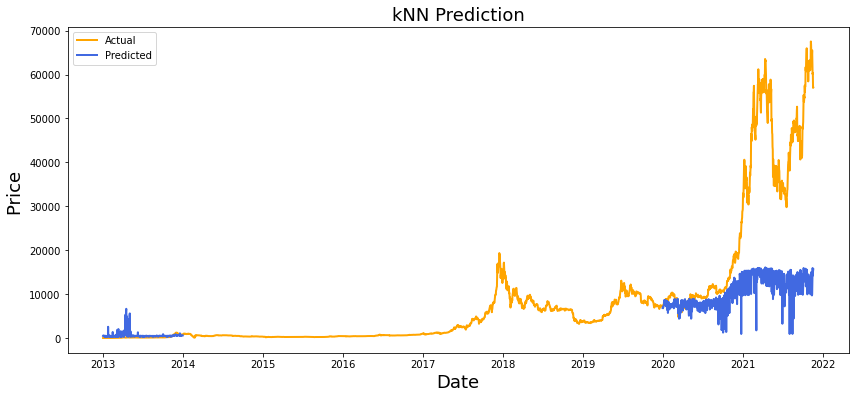

In [24]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], knn_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], knn_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], knn_2021, color='RoyalBlue', lw=2)

plt.title("kNN Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## Linear Regression

In [11]:
from sklearn.linear_model import Lasso

reg = LinearRegression()
reg.fit(X_train, y_train)

reg_pred = reg.predict(X_test)
reg_2013 = reg.predict(X_2013)
reg_2020 = reg.predict(X_2020)
reg_2021 = reg.predict(X_2021)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, reg_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, reg_pred))


Coefficients: 
 [[-4.34725003e-01  8.48007780e-01  5.82136409e-01  1.27717269e+02
   2.14418273e-06]]
Root mean squared error: 462.98
Coefficient of determination: 1.00


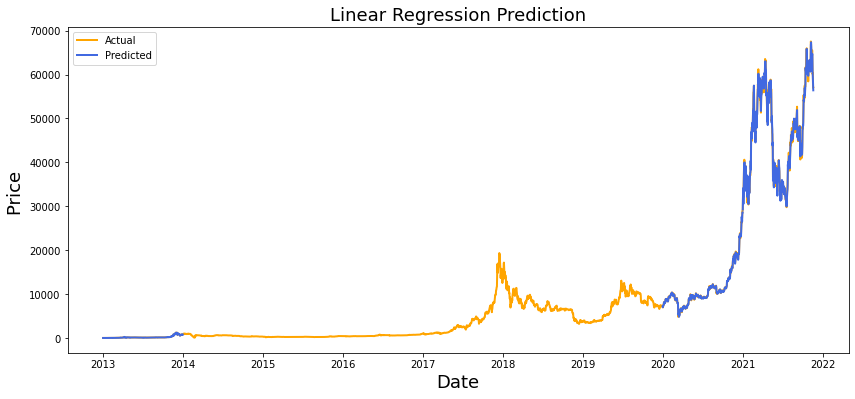

In [23]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], reg_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], reg_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], reg_2021, color='RoyalBlue', lw=2)
plt.title("Linear Regression Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## Bayesian Ridge

In [13]:
from sklearn.linear_model import BayesianRidge

bayes = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
bayes.fit(X_train, y_train.values.ravel())

bayes_pred = bayes.predict(X_test)
bayes_2013 = bayes.predict(X_2013)
bayes_2020 = bayes.predict(X_2020)
bayes_2021 = bayes.predict(X_2021)

# The coefficients
print("Coefficients: \n", bayes.coef_)
# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, bayes_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, bayes_pred))

Coefficients: 
 [-4.57564320e-01  8.62890267e-01  5.89709413e-01  6.53931718e-02
  2.17117327e-06]
Root mean squared error: 463.54
Coefficient of determination: 1.00


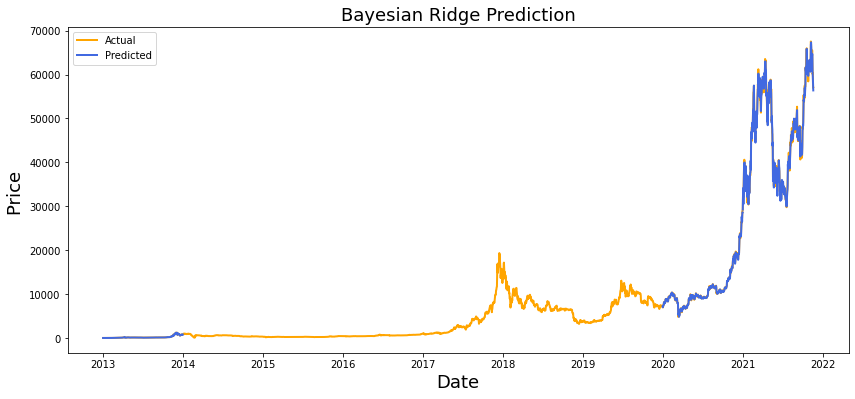

In [14]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], bayes_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], bayes_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], bayes_2021, color='RoyalBlue', lw=2)
plt.title("Bayesian Ridge Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## SVR

In [44]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', C=100)
svr.fit(X_train, y_train.values.ravel())

svr_pred = svr.predict(X_test)
svr_2013 = svr.predict(X_2013)
svr_2020 = svr.predict(X_2020)
svr_2021 = svr.predict(X_2021)

# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, svr_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

Root mean squared error: 26277.09
Coefficient of determination: -0.64


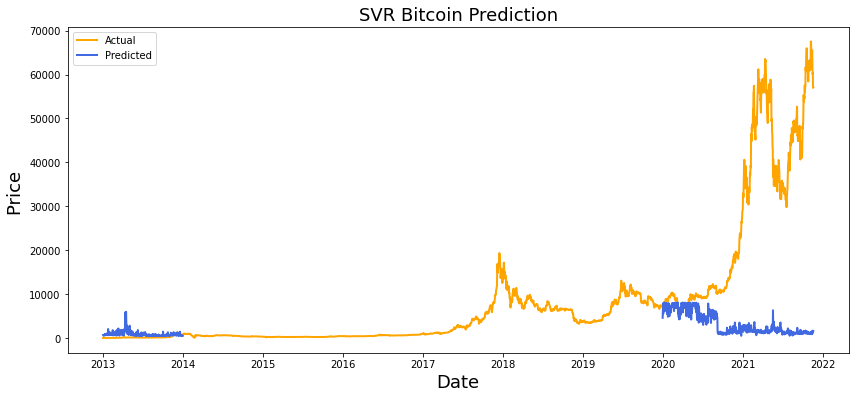

In [16]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], svr_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], svr_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], svr_2021, color='RoyalBlue', lw=2)
plt.title("SVR Bitcoin Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.1)
gbr.fit(X_train, y_train.values.ravel())

gbr_pred = gbr.predict(X_test)
gbr_2013 = gbr.predict(X_2013)
gbr_2020 = gbr.predict(X_2020)
gbr_2021 = gbr.predict(X_2021)

# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, gbr_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, gbr_pred))

Root mean squared error: 16495.23
Coefficient of determination: 0.35


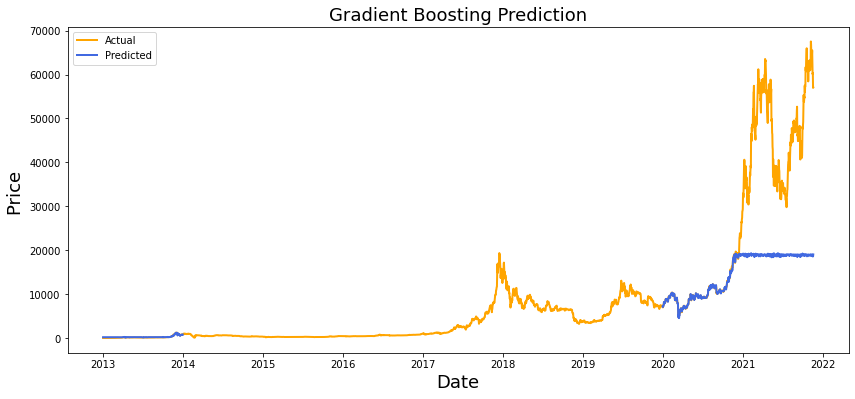

In [18]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], gbr_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], gbr_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], gbr_2021, color='RoyalBlue', lw=2)
plt.title("Gradient Boosting Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## Decision Tree Regression

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=50)
tree.fit(X_train, y_train.values.ravel())

tree_pred = tree.predict(X_test)
tree_2013 = tree.predict(X_2013)
tree_2020 = tree.predict(X_2020)
tree_2021 = tree.predict(X_2021)

# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, tree_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_pred))

Root mean squared error: 16325.28
Coefficient of determination: 0.37


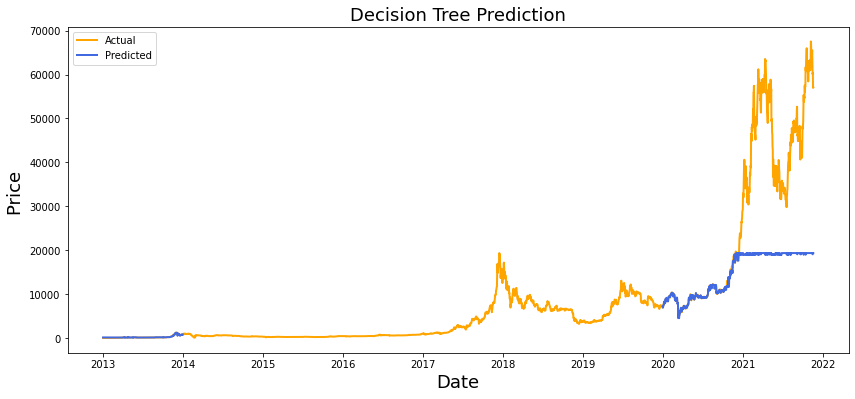

In [20]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], tree_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], tree_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], tree_2021, color='RoyalBlue', lw=2)
plt.title("Decision Tree Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=30)
forest.fit(X_train, y_train.values.ravel())

forest_pred = forest.predict(X_test)
forest_2013 = forest.predict(X_2013)
forest_2020 = forest.predict(X_2020)
forest_2021 = forest.predict(X_2021)

# The mean squared error
print("Root mean squared error: %.2f" % sqrt(mean_squared_error(y_test, forest_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, forest_pred))

Root mean squared error: 16391.62
Coefficient of determination: 0.36


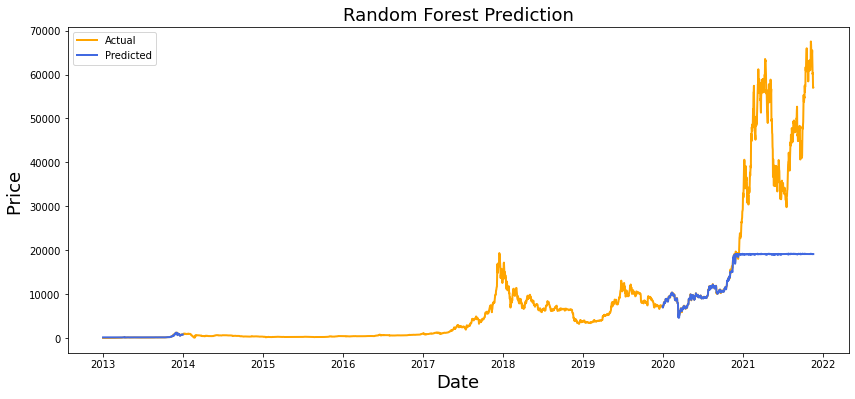

In [22]:
plt.figure(figsize = (14, 6))
plt.plot(df["Year"], df["Price"], color='Orange', lw=2, label = "Actual")
plt.plot(btc_2013['Year'], forest_2013, color='RoyalBlue', lw=2, label = "Predicted")
plt.plot(btc_2020['Year'], forest_2020, color='RoyalBlue', lw=2)
plt.plot(btc_2021['Year'], forest_2021, color='RoyalBlue', lw=2)
plt.title("Random Forest Prediction", size=18)
plt.xlabel("Date", size=18)
plt.ylabel("Price ", size=18)
plt.legend()

## Conclusion
The Linear Regression and Bayesian Ridge both produced promising models which in turn may be overfitting. The decision tree produced the best result at a relatively low depth of 50. It produced a low correlation at r2 score at 0.37 because the model was not trained to predict higher price labels and maxes out at the price spike during early 2018. 

The Bitcoin and most of the cryptocurrency are volatile enough to cause false assumptions and predict wrong results. The statistical models could only be used as an indicator guide to increase chances of the goals already set earlier.
<center>
    <h2>SUMMARY OF RESULTS</h2>
  
</center>

|Machine Learning Method| RMSE | R2 Score | Targeted Parameter
| :---: | :---: | :----: | :----: |
| kNN | 19590.21 | 9% | n_neighbor = 21
| Linear Regression | 462.98 | 100% | Auto
| Bayesian Ridge | 463.54 | 100% | tol = 1e-6 
| SVR | 26277.09 | -64% | C = 100
| Gradient Boosting | 16495.23 | 35% | learning_rate = 0.1
| Decision Tree | 16325.28 | 37% | max_depth = 50
| Random Forest | 16391.62 | 36% | n_estimators = 30
